<a href="https://colab.research.google.com/github/yohan2001colombo/DataScience/blob/main/kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
!pip install -q kaggle

In [158]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amiduyohan","key":"c426231e68046762c0a6308ebf14e97e"}'}

In [159]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [160]:
!kaggle competitions download -c st-4035-2025-assignment-1

st-4035-2025-assignment-1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [161]:
!unzip st-4035-2025-assignment-1.zip -d data

Archive:  st-4035-2025-assignment-1.zip
replace data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: data/sample_submission.csv  
replace data/test_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: data/test_data.csv      
replace data/train_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: data/train_data.csv     


In [162]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [163]:
# Load the Dataset
df = pd.read_csv('data/train_data.csv')

In [164]:
X_train = df.drop('Churn',axis=1)
y_train = df['Churn']

### Check Target Balance

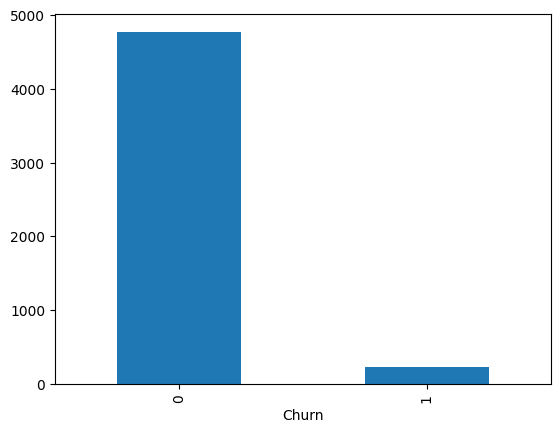

In [165]:
y_train.value_counts(normalize=True)
y_train.value_counts().plot(kind='bar')
plt.show()

The Churn variable is highly imbalanced: 95.42% of the samples belong to class 0 and only 4.52% to class 1. This imbalance may bias the model toward the majority class and reduce its ability to detect the minority class

In [166]:
X_train.head(5)

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,YearsAsCustomer,NumProductsPurchased,WebsiteVisitsPerMonth,LastPurchaseAmount,TimeOnApp,TimeOnWebsite,CustomerSatisfaction,PreferredDevice,Region,IsPremiumMember,ReceivedPromotions,ClickedAds,ReturnedItems,UsedCoupons,FeedbackScore
0,1,56,Male,NaN,66.978399,11,1,3,201.860693,2.902409,2.93,1.0,Tablet,NaN,1,3,6,4,0,6
1,2,69,Female,60275.627399,77.993229,15,8,4,446.681209,1.196631,2.10,4.0,Mobile,East,0,2,0,2,1,8
2,3,46,Female,59795.569870,90.811984,3,9,27,622.056365,NaN,4.12,5.0,NaN,North,0,3,1,0,1,3
3,4,32,Male,64889.496054,69.632267,13,9,7,875.767959,8.067661,5.53,4.0,Mobile,North,1,0,7,2,2,10
4,5,60,Male,28388.877057,36.000510,4,8,3,476.568467,9.085315,1.43,2.0,NaN,West,0,4,9,4,0,7


In [167]:
X_train.columns

Index(['CustomerID', 'Age', 'Gender', 'AnnualIncome', 'SpendingScore',
       'YearsAsCustomer', 'NumProductsPurchased', 'WebsiteVisitsPerMonth',
       'LastPurchaseAmount', 'TimeOnApp', 'TimeOnWebsite',
       'CustomerSatisfaction', 'PreferredDevice', 'Region', 'IsPremiumMember',
       'ReceivedPromotions', 'ClickedAds', 'ReturnedItems', 'UsedCoupons',
       'FeedbackScore'],
      dtype='object')

In [168]:
# remove the duplicated data
X_train.drop_duplicates()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,YearsAsCustomer,NumProductsPurchased,WebsiteVisitsPerMonth,LastPurchaseAmount,TimeOnApp,TimeOnWebsite,CustomerSatisfaction,PreferredDevice,Region,IsPremiumMember,ReceivedPromotions,ClickedAds,ReturnedItems,UsedCoupons,FeedbackScore
0,1,56,Male,NaN,66.978399,11,1,3,201.860693,2.902409,2.93,1.0,Tablet,NaN,1,3,6,4,0,6
1,2,69,Female,60275.627399,77.993229,15,8,4,446.681209,1.196631,2.10,4.0,Mobile,East,0,2,0,2,1,8
2,3,46,Female,59795.569870,90.811984,3,9,27,622.056365,NaN,4.12,5.0,NaN,North,0,3,1,0,1,3
3,4,32,Male,64889.496054,69.632267,13,9,7,875.767959,8.067661,5.53,4.0,Mobile,North,1,0,7,2,2,10
4,5,60,Male,28388.877057,36.000510,4,8,3,476.568467,9.085315,1.43,2.0,NaN,West,0,4,9,4,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,24,Male,68037.361134,1.181129,17,1,23,533.531584,9.767812,5.75,3.0,Desktop,West,1,3,3,0,4,8
4996,4997,66,Female,66156.692586,65.012916,13,3,25,653.811424,9.138960,6.44,4.0,Tablet,East,0,3,0,4,2,2
4997,4998,26,Female,73759.374482,1.862635,9,3,21,52.308756,NaN,8.67,2.0,NaN,North,1,4,8,2,1,1
4998,4999,53,Female,60357.566321,20.590552,13,6,5,282.234808,1.947518,5.10,1.0,Mobile,East,0,4,8,4,2,1


We dropped the `CustomerID` column from the dataset, as it serves as a unique identifier and does not contribute to the analysis or modeling process.


In [169]:
# Drop the CustomerID
X_train.drop(["CustomerID"],axis=1,inplace=True)

## Handling Missing Values

To ensure data quality and consistency, missing values in the dataset were addressed using appropriate imputation techniques based on the nature of each feature

In [170]:
# Handling the missing values
X_train.isnull().sum()

,0
Age,0
Gender,0
AnnualIncome,500
SpendingScore,0
YearsAsCustomer,0
NumProductsPurchased,0
WebsiteVisitsPerMonth,0
LastPurchaseAmount,0
TimeOnApp,500
TimeOnWebsite,0


1. Numerical Features (`AnnualIncome`, `TimeOnApp`)

 - Missing values were replaced with the mean of the respective column.
 - Reasoning: The mean provides a central tendency estimate, minimizing bias while maintaining the overall distribution.

2. Categorical Features (`CustomerSatisfaction`, `PreferredDevice`, `Region`)

 - Missing values were imputed with the mode (most frequent value) of each column.
 - Reasoning: Categorical data lacks numerical relationships, making the mode the most logical choice to preserve data integrity

In [171]:
X_train['AnnualIncome'] = X_train['AnnualIncome'].fillna(X_train['AnnualIncome'].mean())
X_train['TimeOnApp'] = X_train['TimeOnApp'].fillna(X_train['TimeOnApp'].mean())

mode_val_cs = X_train['CustomerSatisfaction'].mode()[0]
X_train['CustomerSatisfaction'] = X_train['CustomerSatisfaction'].fillna(mode_val_cs)
mode_val_pd = X_train['PreferredDevice'].mode()[0]
X_train['PreferredDevice'] = X_train['PreferredDevice'].fillna(mode_val_pd)
mode_val_rg = X_train['Region'].mode()[0]
X_train['Region'] = X_train['Region'].fillna(mode_val_rg)

In [172]:
X_train.isnull().sum()

,0
Age,0
Gender,0
AnnualIncome,0
SpendingScore,0
YearsAsCustomer,0
NumProductsPurchased,0
WebsiteVisitsPerMonth,0
LastPurchaseAmount,0
TimeOnApp,0
TimeOnWebsite,0


In [173]:
X_train.dtypes  # Inspect

,0
Age,int64
Gender,object
AnnualIncome,float64
SpendingScore,float64
YearsAsCustomer,int64
NumProductsPurchased,int64
WebsiteVisitsPerMonth,int64
LastPurchaseAmount,float64
TimeOnApp,float64
TimeOnWebsite,float64


## Exploratory Data Analysis

We performed exploratory data analysis (EDA) to understand patterns and relationships in the dataset.


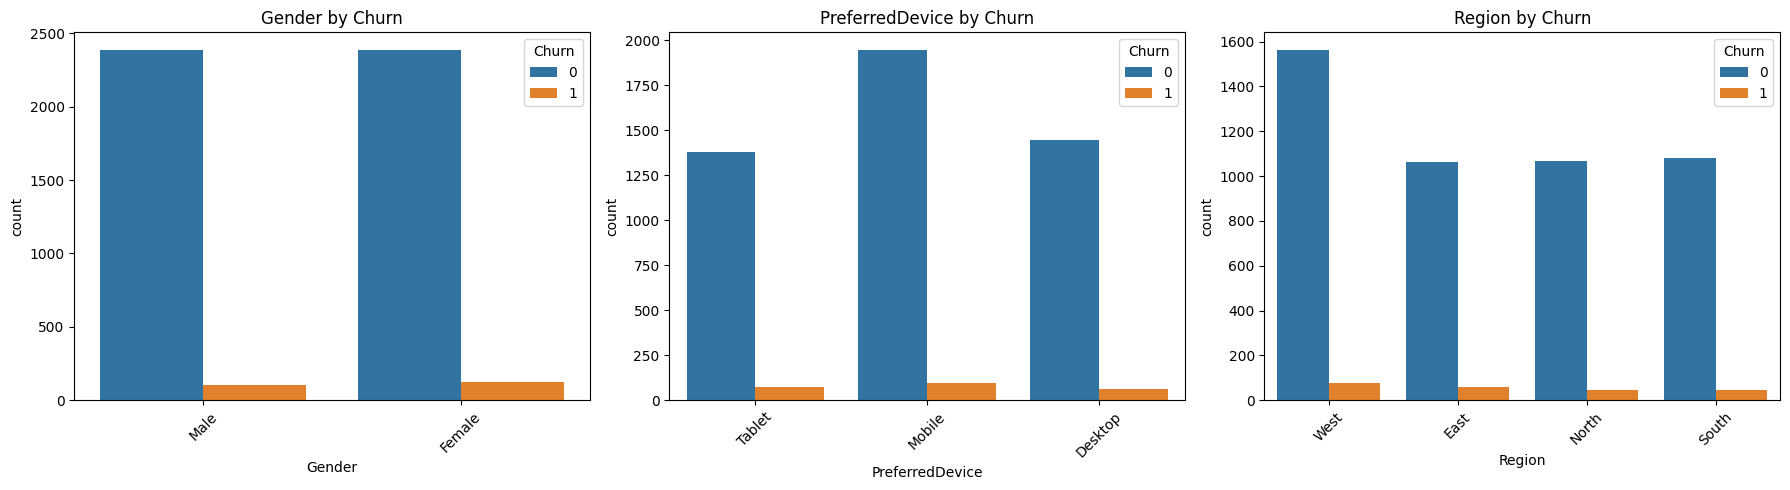

In [174]:
# Combine X_train and y_train
df_train = X_train.copy()
df_train['Churn'] = y_train

# Get the first 3 categorical columns
cat_cols = df_train.select_dtypes(include='object').columns[:3]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 cols

for ax, col in zip(axes, cat_cols):
    sns.countplot(data=df_train, x=col, hue='Churn', ax=ax)
    ax.set_title(f'{col} by Churn')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

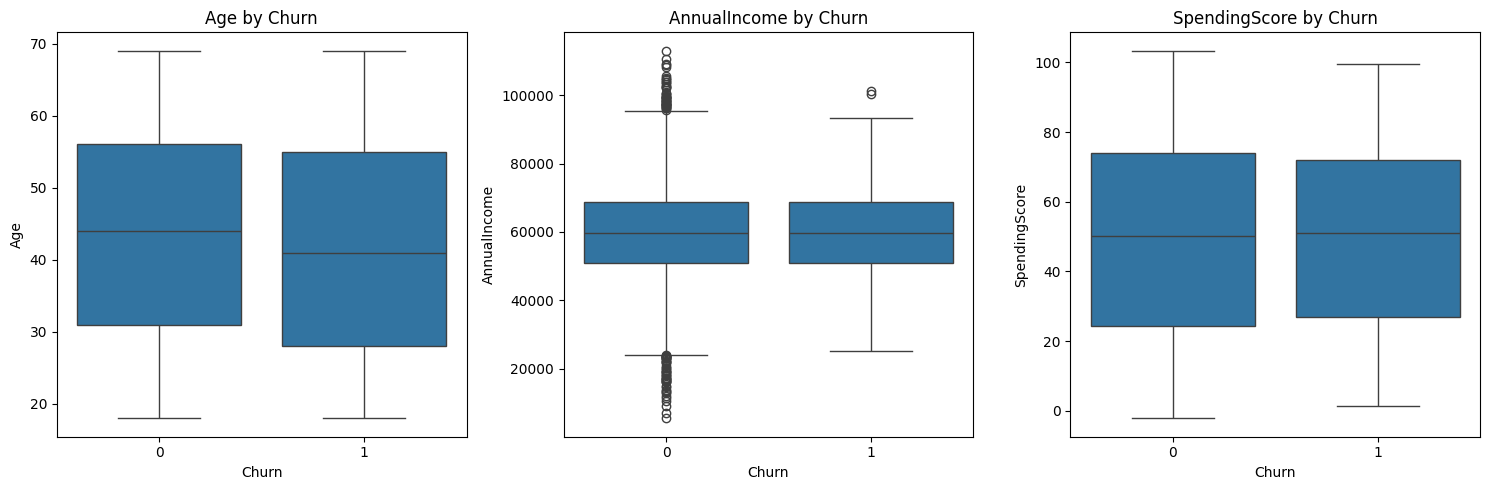

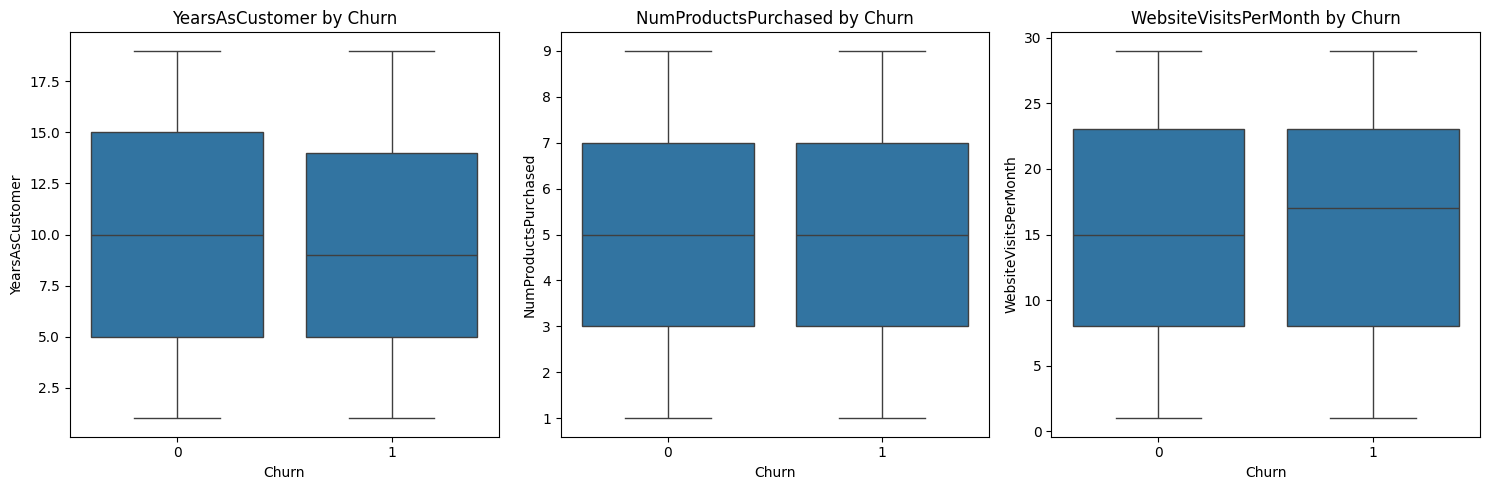

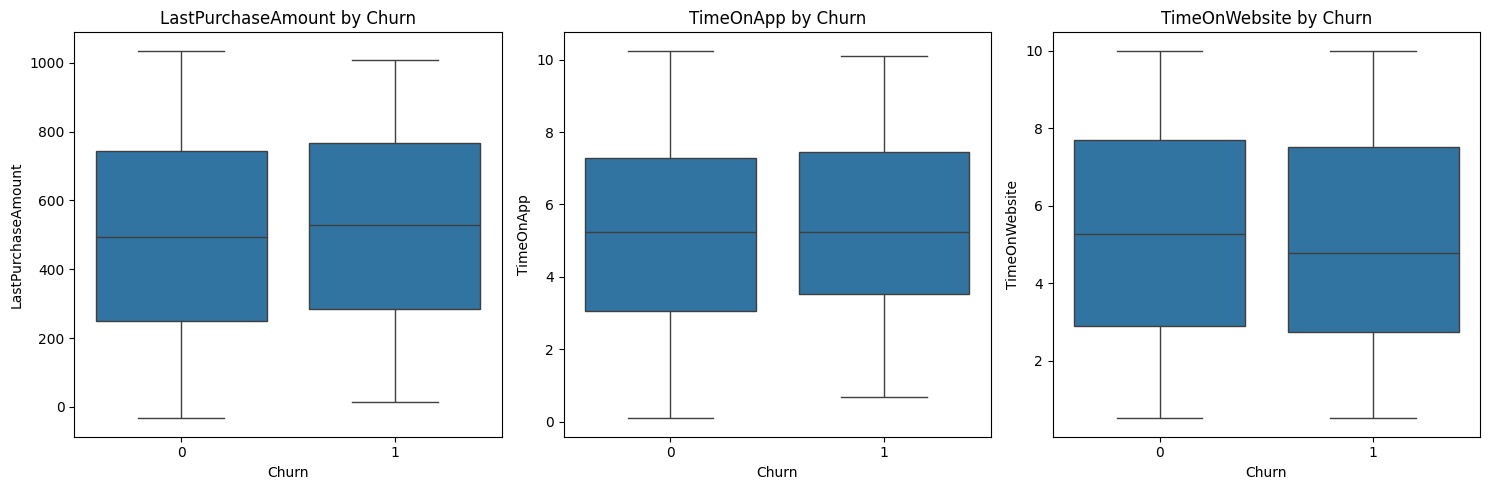

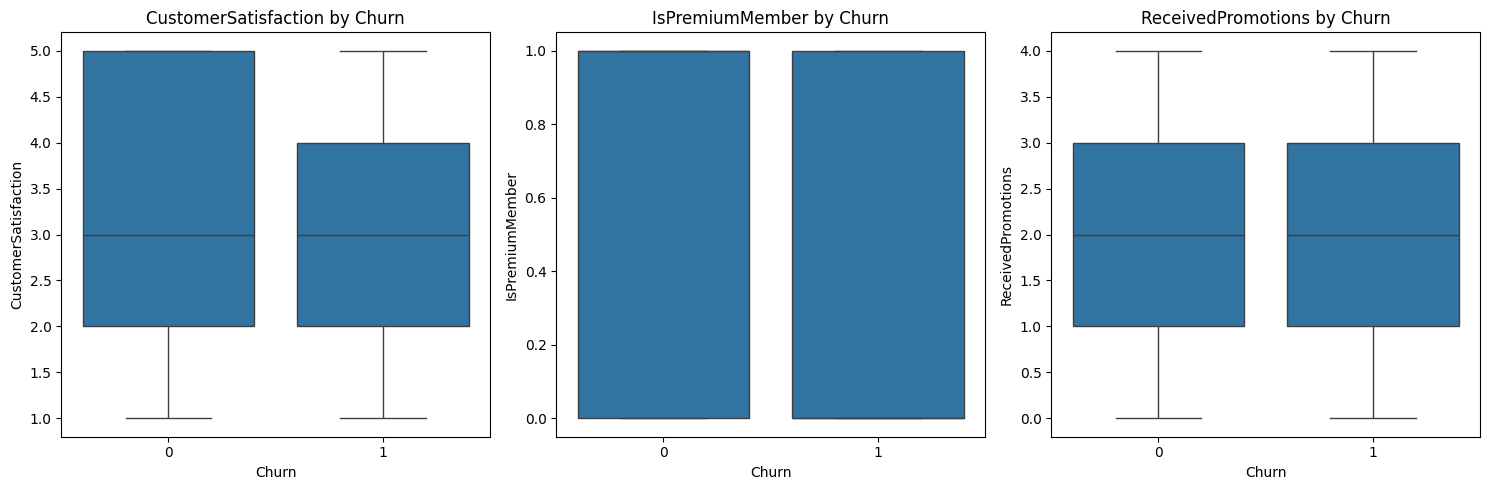

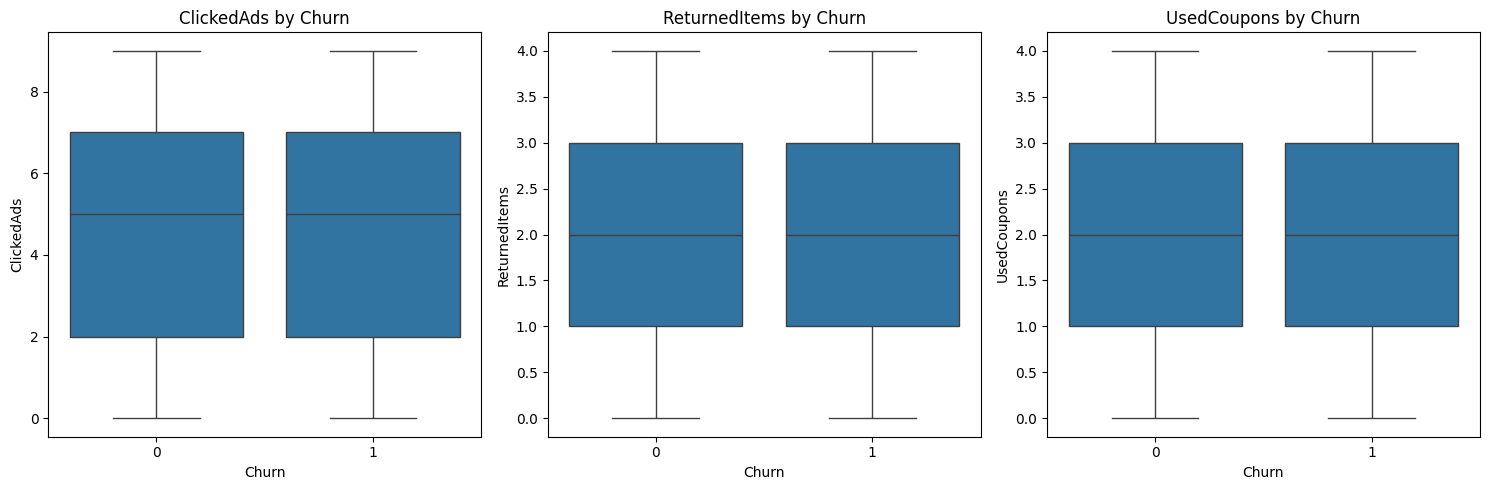

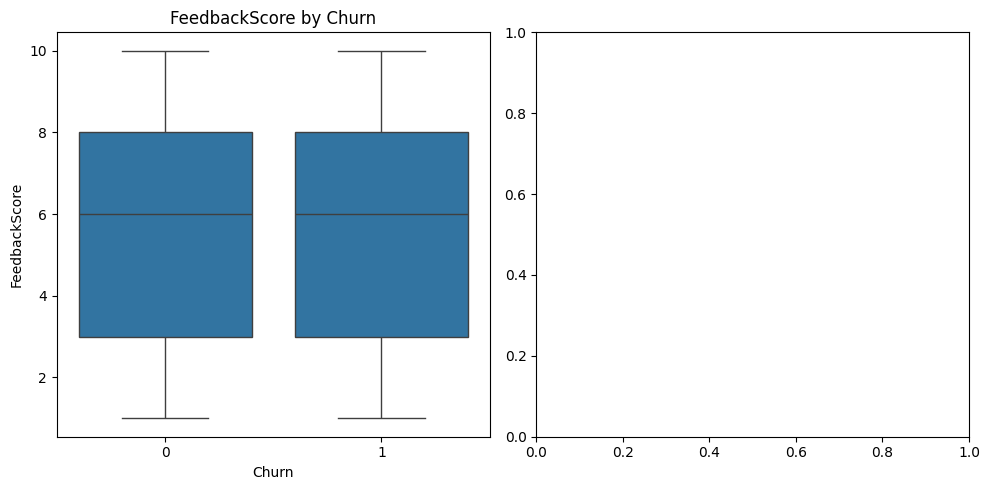

In [175]:
# Boxplots by Churn
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns

l =  len(num_cols)-1

# Loop over the numerical columns in chunks of 3
for i in range(0, l, 3):
    cols_chunk = num_cols[i:i+3]
    fig, axes = plt.subplots(1, len(cols_chunk), figsize=(5 * len(cols_chunk), 5))

    # If only one plot, axes is not an array, make it iterable
    if len(cols_chunk) == 1:
        axes = [axes]

    for ax, col in zip(axes, cols_chunk):
        if col == 'Churn':
            continue
        sns.boxplot(data=df_train, x='Churn', y=col, ax=ax)
        ax.set_title(f'{col} by Churn')

    plt.tight_layout()
    plt.show()

A comparison of median values between churned and non-churned customers reveals several notable differences:
- Age: Customers who churned tend to be younger, with a lower median age compared to those who did not churn.
- Years as Customer: Churned customers have fewer years with the company, indicating a lower median tenure.
- Website Visits per Month: The median number of monthly website visits is higher among churned customers, possibly suggesting increased effort to resolve issues or explore alternatives.
- Last Purchase Amount: Churned customers show a higher median purchase amount on their last transaction, which may indicate one-time buyers or high-value disengagement.
- Time Spent on Website: The median time spent on the website is lower for churned customers, potentially signaling reduced engagement or frustration with the online experience.

### Correlation Analysis

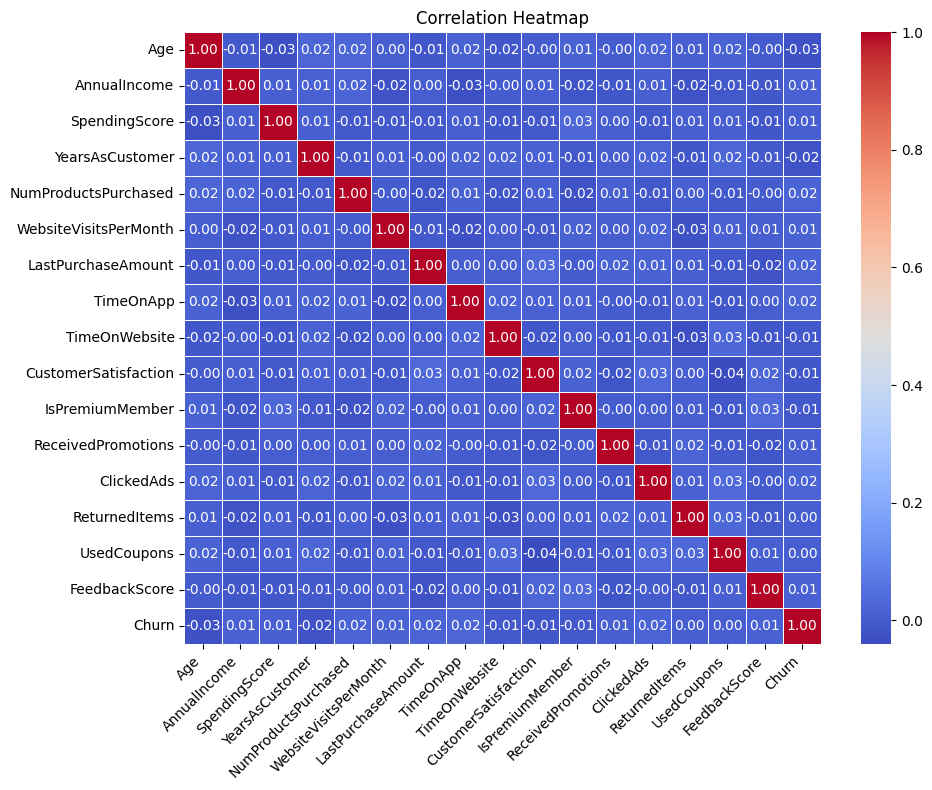

In [176]:
# Numeric features only
num_cols = df_train.select_dtypes(include=['int64', 'float64'])
num_cols = df_train.select_dtypes(include=['int64', 'float64'])
corr = num_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Rotate x-axis labels 45 degrees and y-axis labels 0 degrees for readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


An analysis of the numeric variables revealed no significant linear correlation among them, indicating that these features are likely independent in terms of linear relationships.

To see how features relate to the binary target

In [177]:
corr_with_target = num_cols.corr()['Churn'].sort_values(ascending=False)
print(corr_with_target)

Churn                    1.000000
TimeOnApp                0.021081
ClickedAds               0.019633
NumProductsPurchased     0.018207
LastPurchaseAmount       0.017888
WebsiteVisitsPerMonth    0.013656
AnnualIncome             0.010766
FeedbackScore            0.008076
SpendingScore            0.007587
ReceivedPromotions       0.007020
ReturnedItems            0.001322
UsedCoupons              0.000617
IsPremiumMember         -0.008801
TimeOnWebsite           -0.012045
CustomerSatisfaction    -0.014869
YearsAsCustomer         -0.021621
Age                     -0.027633
Name: Churn, dtype: float64


## Handling Categorical Variables
Encode categorical features for modeling

In [178]:
categorical_cols = X_train.select_dtypes(include=['object', 'category'])
numerical_cols = X_train.select_dtypes(include=['int64', 'float64'])

# for nominal categories
encoder = OneHotEncoder()

# Fit on training data only
encoder.fit_transform(categorical_cols)

encoded_customer = encoder.transform(categorical_cols)


In [179]:
columns = encoder.get_feature_names_out(categorical_cols.columns)

encoded_X_train = pd.DataFrame(encoded_customer.toarray(), columns=columns)


In [180]:
encoded_X_train.head(5)

,Gender_Female,Gender_Male,PreferredDevice_Desktop,PreferredDevice_Mobile,PreferredDevice_Tablet,Region_East,Region_North,Region_South,Region_West
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Data Normalization / Scaling

In [181]:
scaler = StandardScaler()
scaler.fit_transform(numerical_cols)

scaled_customer = scaler.transform(numerical_cols)

In [182]:
scaled_X_train = pd.DataFrame(scaled_customer,columns=numerical_cols.columns)

In [183]:
X_train = pd.concat([encoded_X_train,scaled_X_train],axis=1)

In [184]:
X_train.head(5)

,Gender_Female,Gender_Male,PreferredDevice_Desktop,PreferredDevice_Mobile,PreferredDevice_Tablet,Region_East,Region_North,Region_South,Region_West,Age,...,LastPurchaseAmount,TimeOnApp,TimeOnWebsite,CustomerSatisfaction,IsPremiumMember,ReceivedPromotions,ClickedAds,ReturnedItems,UsedCoupons,FeedbackScore
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.832265,...,-1.039965,-8.946194e-01,-0.840869,-1.503849,0.990446,0.711569,0.493965,1.413577,-1.405221,0.177175
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.703719,...,-0.180748,-1.550845e+00,-1.141734,0.530212,-1.009647,0.004244,-1.594683,-0.000141,-0.701203,0.868186
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.161916,...,0.434746,3.416892e-16,-0.409507,1.208233,-1.009647,0.711569,-1.246575,-1.413860,-0.701203,-0.859341
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.776573,...,1.325168,1.092493e+00,0.101603,0.530212,0.990446,-1.410407,0.842073,-0.000141,0.002816,1.559197
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.100405,...,-0.075856,1.483993e+00,-1.384602,-0.825829,-1.009647,1.418895,1.538290,1.413577,-1.405221,0.522681


In [185]:
X_train.shape

(5000, 25)

## Logistic Regression model

In [186]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

### Prepare Test Data and Evaluate

In [189]:
X_test = pd.read_csv('data/test_data.csv')

X_test.drop(['CustomerID'],axis=1,inplace=True)

categorical_cols = X_test.select_dtypes(include=['object', 'category'])
numerical_cols = X_test.select_dtypes(include=['int64', 'float64'])

encoded_customer = encoder.transform(categorical_cols)
encoded_X_test = pd.DataFrame(encoded_customer.toarray(), columns=columns)

scaled_customer = scaler.transform(numerical_cols)
scaled_X_test = pd.DataFrame(scaled_customer,columns=numerical_cols.columns)

X_test = pd.concat([encoded_X_test,scaled_X_test],axis=1)

In [190]:
X_test.head(5)

,Gender_Female,Gender_Male,PreferredDevice_Desktop,PreferredDevice_Mobile,PreferredDevice_Tablet,Region_East,Region_North,Region_South,Region_West,Age,...,LastPurchaseAmount,TimeOnApp,TimeOnWebsite,CustomerSatisfaction,IsPremiumMember,ReceivedPromotions,ClickedAds,ReturnedItems,UsedCoupons,FeedbackScore
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.765230,...,0.332349,0.789474,-1.243231,0.530212,0.990446,-0.703081,-1.594683,-1.413860,0.706835,0.177175
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.698195,...,0.419176,-0.683957,-0.826369,0.530212,0.990446,-0.703081,-0.550359,-0.000141,-0.701203,0.177175
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.446922,...,1.539610,0.662521,0.039980,1.208233,0.990446,0.711569,-0.898467,-0.707001,-0.701203,1.559197
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.843607,...,-0.541958,0.527873,-1.649219,-1.503849,0.990446,0.711569,1.190182,1.413577,0.706835,-1.550352
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.569649,...,-0.780153,-1.272560,-1.123610,-0.825829,0.990446,0.711569,-1.246575,-0.000141,-1.405221,1.559197


In [204]:
y_test_pred = model.predict(X_test)
y_test_pred.shape

(200,)

In [210]:
CustomerID = [s for s in range(5000, 5000 + len(y_test_pred))]
prediction = pd.DataFrame({
    'CustomerID': range(5000, 5000 + len(y_test_pred)),
    'Final': y_test_pred
})




In [214]:
prediction.head()

,CustomerID,Final
0,5000,0
1,5001,0
2,5002,0
3,5003,0
4,5004,0


In [215]:
prediction.to_csv('prediction.csv',index=False)